In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [5]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [6]:
mensual_p = mensual['n_trips']

In [7]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [8]:
mensual_p = mensual_p.reset_index()

In [9]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [334]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 1000, mcmc_samples=100, interval_width= 0.7, seasonality_prior_scale=1,changepoint_prior_scale =0.06)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/c3a2h0it.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/r6bgw5kr.json
01:38:35 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=64195', 'data', 'file=/tmp/tmplnvzjdhf/c3a2h0it.json', 'init=/tmp/tmplnvzjdhf/r6bgw5kr.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelgls2qba7/prophet_model-20241119013835_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=64195', 'data', 'file=/tmp/tmplnvzjdhf/c3a2h0it.json', 'init=/tmp/tmplnvzjdhf/r6bgw5kr.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelgls2qba7/prophet_model-20241119013835_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

01:38:37 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=64195', 'data', 'file=/tmp/tmplnvzjdhf/c3a2h0it.json', 'init=/tmp/tmplnvzjdhf/r6bgw5kr.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelgls2qba7/prophet_model-20241119013835_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelgls2qba7/prophet_model-20241119013835_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelgls2qba7/prophet_model-20241119013835_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [335]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.822826e+06,2.955910e+06,3.189379e+06,2.755922e+06,2.892237e+06,248256.489416,183099.260711,308094.061318,248256.489416,183099.260711,308094.061318,0.0,0.0,0.0,3.071082e+06
1,2022-04-30,2.811797e+06,2.865640e+06,3.093791e+06,2.750231e+06,2.870031e+06,163743.206882,87180.969485,236539.223748,163743.206882,87180.969485,236539.223748,0.0,0.0,0.0,2.975540e+06
2,2022-05-31,2.799826e+06,2.920398e+06,3.141833e+06,2.742470e+06,2.854213e+06,227984.054002,160623.703368,299491.715305,227984.054002,160623.703368,299491.715305,0.0,0.0,0.0,3.027810e+06
3,2022-06-30,2.788330e+06,2.810414e+06,3.028459e+06,2.732666e+06,2.837327e+06,138684.352310,65797.129316,219643.824388,138684.352310,65797.129316,219643.824388,0.0,0.0,0.0,2.927014e+06
4,2022-07-31,2.774603e+06,2.483616e+06,2.700808e+06,2.719790e+06,2.828490e+06,-180828.520999,-237155.753984,-119990.761705,-180828.520999,-237155.753984,-119990.761705,0.0,0.0,0.0,2.593775e+06
5,2022-08-31,2.758271e+06,2.416522e+06,2.645311e+06,2.700066e+06,2.808794e+06,-226191.661926,-290761.496143,-164616.616944,-226191.661926,-290761.496143,-164616.616944,0.0,0.0,0.0,2.532080e+06
6,2022-09-30,2.740793e+06,2.374286e+06,2.627546e+06,2.684159e+06,2.791486e+06,-239573.080312,-325671.496474,-162460.837863,-239573.080312,-325671.496474,-162460.837863,0.0,0.0,0.0,2.501220e+06
7,2022-10-31,2.720661e+06,2.853319e+06,3.090810e+06,2.662874e+06,2.774024e+06,245484.689766,159721.059749,323395.360992,245484.689766,159721.059749,323395.360992,0.0,0.0,0.0,2.966145e+06
8,2022-11-30,2.699703e+06,2.524941e+06,2.782620e+06,2.642978e+06,2.754206e+06,-44662.820618,-114707.405730,29391.433258,-44662.820618,-114707.405730,29391.433258,0.0,0.0,0.0,2.655040e+06
9,2022-12-31,2.677473e+06,2.616509e+06,2.866266e+06,2.620204e+06,2.733891e+06,61203.859409,-33462.846813,156429.968636,61203.859409,-33462.846813,156429.968636,0.0,0.0,0.0,2.738677e+06


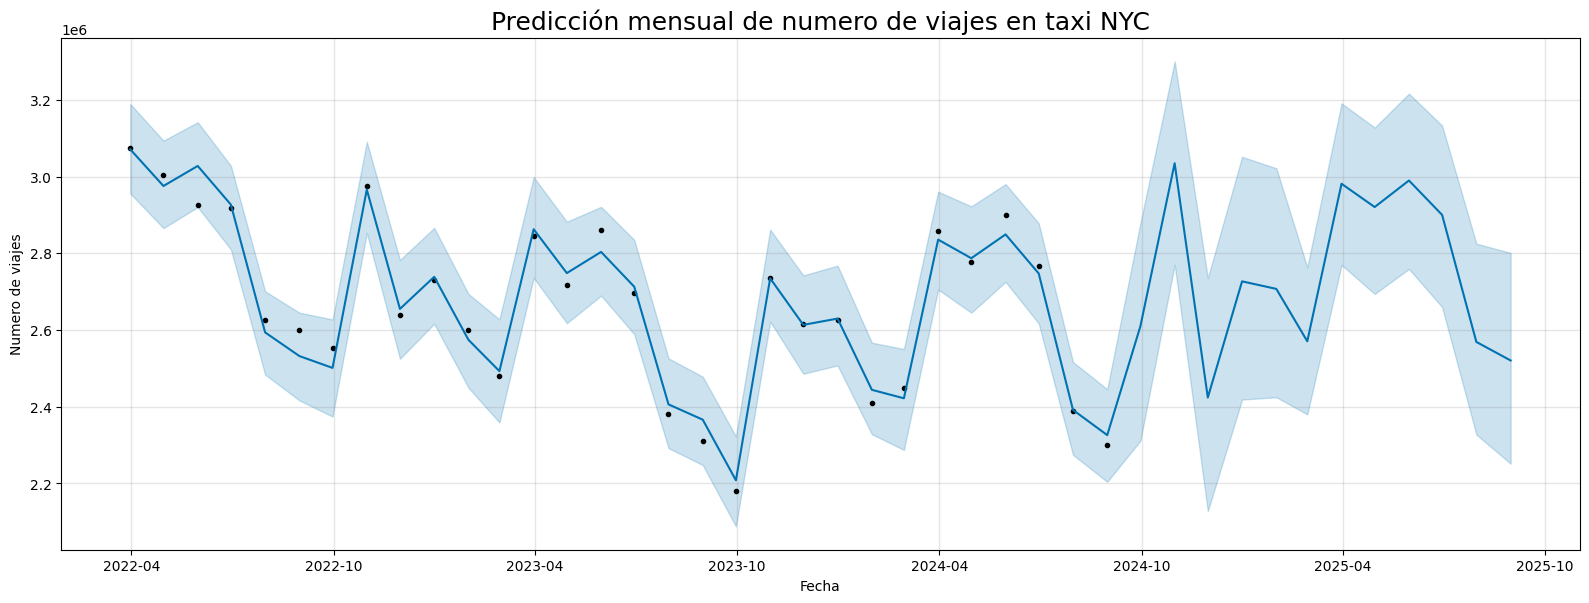

In [336]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

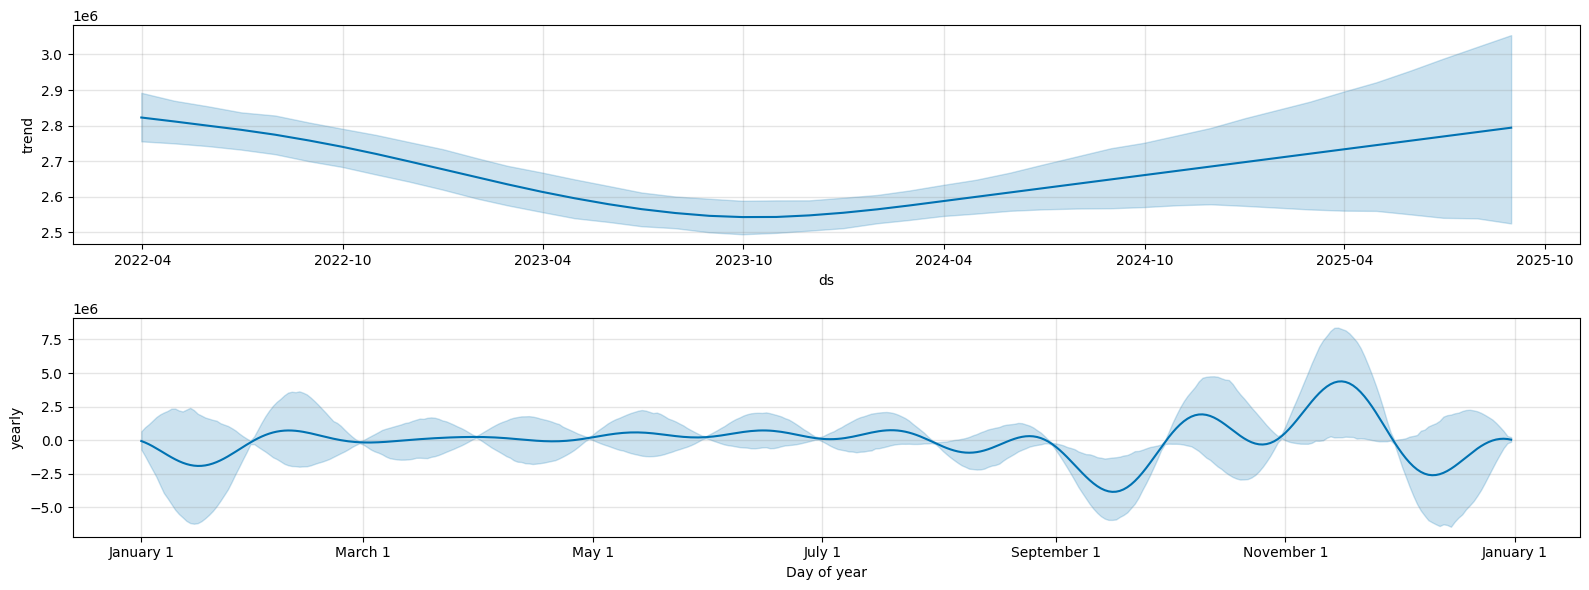

In [337]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [338]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [339]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/equiay51.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/50dtu2bk.json
01:38:38 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=66732', 'data', 'file=/tmp/tmplnvzjdhf/equiay51.json', 'init=/tmp/tmplnvzjdhf/50dtu2bk.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modeltzm1j5e7/prophet_model-20241119013838_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=66732', 'data', 'file=/tmp/tmplnvzjdhf/equiay51.json', 'init=/tmp/tmplnvzjdhf/50dtu2bk.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modeltzm1j5e7/prophet_model-20241119013838_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

01:38:41 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=66732', 'data', 'file=/tmp/tmplnvzjdhf/equiay51.json', 'init=/tmp/tmplnvzjdhf/50dtu2bk.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modeltzm1j5e7/prophet_model-20241119013838_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modeltzm1j5e7/prophet_model-20241119013838_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modeltzm1j5e7/prophet_model-20241119013838_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [340]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,2.339092e+06,2.030123e+06,2.671725e+06,2179200,2023-09-01
1,2023-10-31,2.749505e+06,2.399765e+06,3.105092e+06,2736389,2023-09-01
2,2023-11-30,2.478604e+06,2.127583e+06,2.829790e+06,2616757,2023-09-01
3,2023-12-31,2.479996e+06,2.141438e+06,2.783009e+06,2625768,2023-09-01
4,2024-01-31,2.400316e+06,2.069878e+06,2.766649e+06,2409342,2023-09-01
5,2024-02-29,2.280751e+06,1.485613e+06,3.040395e+06,2448952,2023-09-01
6,2024-03-31,2.693011e+06,2.282835e+06,3.105419e+06,2858661,2023-09-01
7,2024-04-30,2.661494e+06,2.276708e+06,3.048155e+06,2777362,2023-09-01
8,2024-05-31,2.297508e+06,1.878796e+06,2.773347e+06,2899539,2023-09-01
9,2024-06-30,2.481322e+06,1.992541e+06,2.981407e+06,2767032,2023-09-01


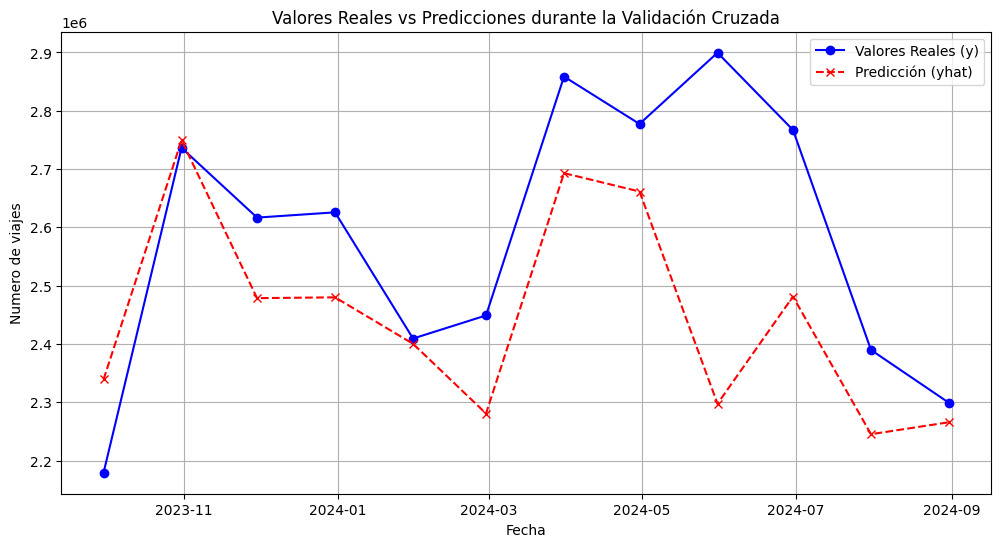

In [341]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


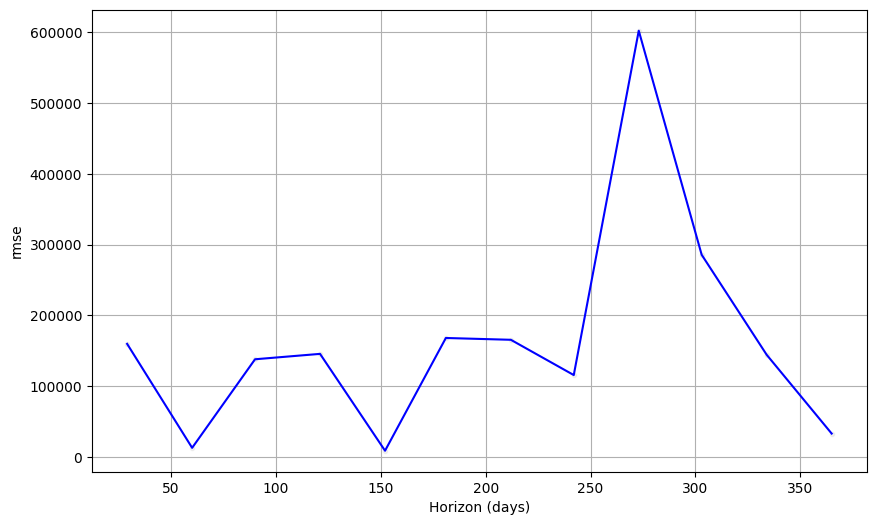

In [342]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [343]:
df_p_1 = performance_metrics(df_cv_1)

In [344]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 165094.45112089012


In [345]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 165094.45112089012


In [346]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 0.9166666666666666


In [347]:
print('La MAPE es:', df_p_1.mape.mean())

La MAPE es: 0.0620308523654699


In [348]:
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,5.011348e+10,165094.451121,165094.451121,0.062031,0.062031,0.065126,0.916667
std,109 days 20:33:46.987269072,1.006934e+11,157908.958799,157908.958799,0.054412,0.054412,0.060615,0.288675
min,29 days 00:00:00,8.147108e+07,9026.133355,9026.133355,0.003746,0.003746,0.003753,0.000000
25%,113 days 06:00:00,1.034519e+10,95209.570594,95209.570594,0.034903,0.034903,0.035596,1.000000
50%,196 days 12:00:00,2.106218e+10,145126.726808,145126.726808,0.056731,0.056731,0.058388,1.000000
75%,280 days 12:00:00,2.765268e+10,166287.290207,166287.290207,0.069855,0.069855,0.070863,1.000000
max,365 days 00:00:00,3.624412e+11,602030.887227,602030.887227,0.207630,0.207630,0.231682,1.000000


In [349]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,5.011348e+10,223860.403944,165094.451121,0.062031,0.056731,0.065126,0.916667


In [350]:
forecast_1.to_csv('forecast_mensual.csv')